# Agglomerative Hierarchial Clustering


In [1]:
#import libraries
import numpy as np
import pandas as pd
import sklearn
import scipy

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import scipy.spatial.distance as ssd
import scipy.cluster.hierarchy as hcluster

import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances

# Setting defaults

In [2]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [3]:
df = pd.read_csv('auto-mpg.csv')
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Using scipy to generate dendrograms

In [5]:
z = linkage(df.iloc[:,:3].values,'average')

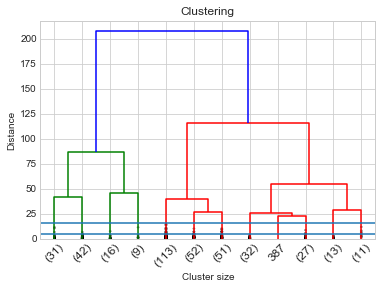

In [6]:
#p = 12 specifies till how many leaf nodes to show 
dendrogram(z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=12, show_contracted=True)

plt.title('Clustering')
plt.xlabel('Cluster size')
plt.ylabel('Distance')

plt.axhline(y=5)
plt.axhline(y=16)
plt.show()

With code

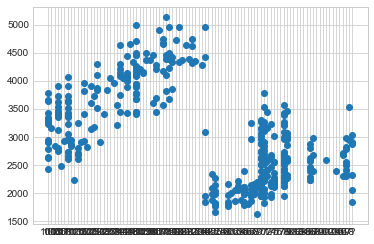

In [7]:
x = df['horsepower']
y = df['weight']
plt.scatter(x,y)


## Calculating distance matrix

In [8]:
#calculating distance matrix mj
#between horsepower and weight
#reduce dataset
df.drop(df.index[6:], inplace=True)
initial_distances = pairwise_distances(df.iloc[:,3:5],metric='manhattan')
initial_distances

array([[  0., 224.,  88.,  91.,  65., 905.],
       [224.,   0., 272., 275., 269., 681.],
       [ 88., 272.,   0.,   3.,  23., 953.],
       [ 91., 275.,   3.,   0.,  26., 956.],
       [ 65., 269.,  23.,  26.,   0., 950.],
       [905., 681., 953., 956., 950.,   0.]])

## Dendogram for 6 head points

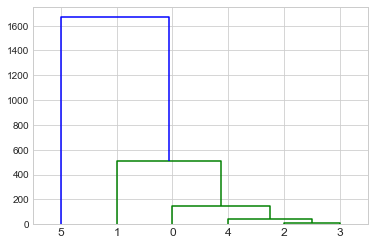

In [9]:
ans = scipy.spatial.distance.squareform(initial_distances, force='no', checks=True)

distVec = ssd.squareform(ans)
linkage = hcluster.linkage(1 - distVec)
dendro  = hcluster.dendrogram(linkage)
plt.show()

In [10]:
np.fill_diagonal(initial_distances, np.inf)
initial_distances

array([[ inf, 224.,  88.,  91.,  65., 905.],
       [224.,  inf, 272., 275., 269., 681.],
       [ 88., 272.,  inf,   3.,  23., 953.],
       [ 91., 275.,   3.,  inf,  26., 956.],
       [ 65., 269.,  23.,  26.,  inf, 950.],
       [905., 681., 953., 956., 950.,  inf]])

###  Main logic for making clusters and calculating distance matrix

In [11]:
#finding minimum value from the distance matrix
#note that this loop will always return minimum value from bottom triangle of matrix
input = initial_distances

print('Original distance matrix : ')

print(input)

# main logic
for k in range(1, input.shape[0]):
    min_val = np.inf

    for i in range(0, input.shape[0]):
        for j in range(0, input.shape[1]):
            if(input[i][j]<=min_val):
                min_val = input[i][j]
                row_index = i
                col_index = j

    #once we find the minimum value, we need to update the distance matrix
    #updating the matrix by calculating the new distances from the cluster to all points

    #for Single Linkage
    if(linkage == "single" or linkage =="Single"):
        for i in range(0,input.shape[0]):
            if(i != col_index):
                #we calculate the distance of every data point from newly formed cluster and update the matrix.
                temp = min(input[col_index][i],input[row_index][i])
                #we update the matrix symmetrically as our distance matrix should always be symmetric
                input[col_index][i] = temp
                input[i][col_index] = temp

    
    #set the rows and columns for the cluster with higher index i.e. the row index to infinity
    #Set input[row_index][for_all_i] = infinity
    #set input[for_all_i][row_index] = infinity
    
    for i in range (0,input.shape[0]):
        input[row_index][i] = np.inf
        input[i][row_index] = np.inf
    #Manipulating the dictionary to keep track of cluster formation in each step
    #if k=0,then all datapoints are clusters

    print('\n'+'Clustering row : '+ str(row_index)+'\n')
    print('Clustering column : '+ str(col_index)+'\n')
    print('After Clustering the matrix becomes : ')
    print(input)
    

Original distance matrix : 
[[ inf 224.  88.  91.  65. 905.]
 [224.  inf 272. 275. 269. 681.]
 [ 88. 272.  inf   3.  23. 953.]
 [ 91. 275.   3.  inf  26. 956.]
 [ 65. 269.  23.  26.  inf 950.]
 [905. 681. 953. 956. 950.  inf]]

Clustering row : 3

Clustering column : 2

After Clustering the matrix becomes : 
[[ inf 224.  88.  inf  65. 905.]
 [224.  inf 272.  inf 269. 681.]
 [ 88. 272.  inf  inf  23. 953.]
 [ inf  inf  inf  inf  inf  inf]
 [ 65. 269.  23.  inf  inf 950.]
 [905. 681. 953.  inf 950.  inf]]

Clustering row : 4

Clustering column : 2

After Clustering the matrix becomes : 
[[ inf 224.  88.  inf  inf 905.]
 [224.  inf 272.  inf  inf 681.]
 [ 88. 272.  inf  inf  inf 953.]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [905. 681. 953.  inf  inf  inf]]

Clustering row : 2

Clustering column : 0

After Clustering the matrix becomes : 
[[ inf 224.  inf  inf  inf 905.]
 [224.  inf  inf  inf  inf 681.]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf 

c:\python27\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
